In [ ]:
#Importing libraries
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Libraries for KNN Imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [3]:
EconData = pd.read_csv('C:/Users/denis/OneDrive/Desktop/Thesis Project Stuff/Data Cleaning/EconomicDataFinal.csv')
AdditionalData = pd.read_csv('C:/Users/denis/OneDrive/Desktop/Thesis Project Stuff/Data Cleaning/Additional Data for Clustering.csv')

In [ ]:
#Merging the two dataframes on the 'Country' and 'Time' columns using custom suffixes
#Ensure the 'Time' column is converted to integers before parsing
EconData['Time'] = EconData['Time'].astype(float).astype(int)
AdditionalData['Time'] = AdditionalData['Time'].astype(float).astype(int)

#Merging the two dataframes on the 'Country' and 'Time' columns with custom suffixes
EconData = pd.merge(EconData, AdditionalData, on=['Country', 'Time'], how='inner', suffixes=('_Econ', '_Add'))

In [5]:
EconData.tail(10)

,Country,Time,GDP (Current $),GDP Growth (Yrly %),GDP per Capita (Current $),Access to clean fuels and technologies for cooking (% of population),Renewable energy consumption (% of total final energy consumption),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",...,"Educational attainment, at least completed primary, population 25+ years, male (%) (cumulative)","Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative)","Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)",Fossil fuel energy consumption (% of total),"Electricity production from renewable sources, excluding hydroelectric (kWh)","Central government debt, total (% of GDP)",Gross national expenditure (% of GDP),Interest payments (% of revenue),"Inflation, consumer prices (annual %)"
308,Uganda,2023,4.876896e+10,5.336973,1002.309139,NaN,NaN,51.5,42.4,76.4,...,NaN,NaN,NaN,NaN,NaN,NaN,53.146935,103.992428,20.833165,5.350948
309,United Kingdom,2021,3.143320e+12,8.575951,46896.866240,100.0,12.2,100.0,100.0,100.0,...,100.000000,40.939999,99.91,99.61,77.54,1.167800e+11,186.794916,100.223987,7.898292,2.518371
310,United Kingdom,2022,3.114040e+12,4.839085,45935.927650,100.0,NaN,100.0,100.0,99.9,...,99.401619,36.627270,NaN,NaN,77.21,NaN,141.244397,101.746141,11.816385,7.922049
311,United Kingdom,2023,3.380850e+12,0.339966,49463.855460,NaN,NaN,100.0,100.0,100.0,...,99.504913,37.758781,NaN,NaN,75.54,NaN,138.193490,100.560362,9.030917,6.793967
312,United States,2021,2.368120e+13,6.055053,71318.307360,100.0,10.9,100.0,100.0,100.0,...,97.218689,36.116840,96.79,93.09,81.38,6.127956e+11,118.400948,103.631704,11.395363,4.697859
313,United States,2022,2.600690e+13,2.512375,78035.175360,100.0,NaN,100.0,100.0,100.0,...,98.949997,39.009998,NaN,NaN,81.37,NaN,112.817613,103.687230,13.405689,8.002800
314,United States,2023,2.772070e+13,2.887556,82769.412210,NaN,NaN,100.0,100.0,100.0,...,99.689590,39.660122,NaN,NaN,81.59,NaN,114.755553,102.876337,17.983682,4.116338
315,Uruguay,2021,6.076080e+10,5.561893,17888.211510,100.0,57.8,100.0,100.0,100.0,...,91.570000,NaN,75.73,72.35,46.76,8.220390e+09,58.094119,92.859567,7.509743,7.747914
316,Uruguay,2022,7.016468e+10,4.707258,20691.973900,100.0,NaN,100.0,100.0,100.0,...,92.400002,25.420000,NaN,NaN,44.91,NaN,54.573824,94.929288,6.638934,9.104380
317,Uruguay,2023,7.724083e+10,0.367475,22797.811170,NaN,NaN,100.0,100.0,100.0,...,92.317108,NaN,NaN,NaN,NaN,NaN,62.977493,96.737888,6.622442,5.869104


In [ ]:
#Identifying data types and missing values in one table
#Get the data types
dtypes = EconData.dtypes

#Determining the number of missing values in each column
missingValues = EconData.isna().sum()

#Creating a new DataFrame for combined information
info = pd.DataFrame({'Variable Name': dtypes.index,'Data Type': dtypes.values,'Missing Values': missingValues.values})

#Converting DataFrame to table format with right alignment
table = tabulate(info, headers='keys', tablefmt='pretty', showindex=False, colalign=("right", "right", "right"))
print(table)


+-------------------------------------------------------------------------------------------------------------------------+-----------+----------------+
|                                                                                                           Variable Name | Data Type | Missing Values |
+-------------------------------------------------------------------------------------------------------------------------+-----------+----------------+
|                                                                                                                 Country |    object |              0 |
|                                                                                                                    Time |     int64 |              0 |
|                                                                                                         GDP (Current $) |   float64 |              2 |
|                                                                                 

In [8]:
#dropping redundant columns with _x and _y
EconData = EconData.loc[:, ~EconData.columns.str.endswith('_x') & ~EconData.columns.str.endswith('_y')]

In [ ]:
#standardizing column names by dropping _Econ and _Add suffixes
EconData.columns = [col.replace(' _Econ', '').replace(' _Add', '') for col in EconData.columns]

In [10]:
EconData.shape

(318, 30)

In [11]:
EconData.head(10)

,Country,Time,GDP (Current $),GDP Growth (Yrly %),GDP per Capita (Current $),Access to clean fuels and technologies for cooking (% of population),Renewable energy consumption (% of total final energy consumption),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",...,"Educational attainment, at least completed primary, population 25+ years, male (%) (cumulative)","Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative)","Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)",Fossil fuel energy consumption (% of total),"Electricity production from renewable sources, excluding hydroelectric (kWh)","Central government debt, total (% of GDP)",Gross national expenditure (% of GDP),Interest payments (% of revenue),"Inflation, consumer prices (annual %)"
0,Albania,2021,1.803201e+10,8.969553,6413.283286,83.6,41.9,100.0,100.0,100.0,...,98.118729,19.472927,45.69,42.59,56.22,4.171000e+07,81.920133,113.324263,6.505615,2.041472
1,Albania,2022,1.901724e+10,4.826688,6846.426143,84.6,NaN,100.0,100.0,100.0,...,98.340546,21.360638,NaN,NaN,55.06,NaN,NaN,110.303936,7.327638,6.725203
2,Albania,2023,2.354718e+10,3.936625,8575.171134,NaN,NaN,100.0,100.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.163525,7.057279,4.759764
3,Argentina,2021,4.865640e+11,10.441812,10738.017920,99.9,9.2,100.0,100.0,100.0,...,NaN,NaN,73.75,69.56,87.40,1.388096e+10,NaN,96.945271,7.836614,NaN
4,Argentina,2022,6.327900e+11,5.269880,13935.681110,99.9,NaN,100.0,100.0,100.0,...,NaN,NaN,NaN,NaN,86.96,NaN,NaN,98.529935,9.472594,NaN
5,Argentina,2023,6.460750e+11,-1.611002,14187.482730,NaN,NaN,100.0,100.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.708189,NaN,NaN
6,Armenia,2021,1.387891e+10,5.800000,4685.179971,98.0,9.1,100.0,100.0,99.9,...,99.801941,29.258392,52.18,59.38,78.22,1.657000e+08,60.080360,107.857009,10.944113,7.184836
7,Armenia,2022,1.951351e+10,12.600000,6571.974455,97.9,NaN,100.0,100.0,100.0,...,99.697197,28.606476,NaN,NaN,75.78,NaN,46.551823,100.960817,9.859041,8.640911
8,Armenia,2023,2.408575e+10,8.300000,8053.010663,NaN,NaN,100.0,100.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,48.256285,100.810472,11.108931,1.980419
9,Australia,2021,1.556740e+12,2.111168,60607.778860,100.0,12.3,100.0,100.0,100.0,...,100.000000,38.799999,100.00,98.59,91.53,5.560000e+10,70.010912,96.189080,3.206561,2.863910


In [12]:
#removing countries that are not part of prechosen 106 countries
specifiedCountries = ['Albania', 'Argentina', 'Armenia', 'Australia', 'Austria', 
                      'Bangladesh', 'Barbados', 'Belgium', 'Bolivia', 'Bosnia and Herzegovina', 
                      'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Canada', 'Chile', 'China', 'Colombia', 
                      'Congo, Dem. Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Dominican Republic', 
                      'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Guatemala', 'Honduras', 
                      'Hungary', 'Iceland', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kenya', 'Korea, Rep.', 'Kosovo',
                      'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Lesotho', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives',
                      'Malta', 'Mauritius', 'Mexico', 'Moldova', 'Mongolia', 'Morocco', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Nigeria', 
                      'North Macedonia', 'Norway', 'Pakistan', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania',
                      'Russian Federation', 'Rwanda', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Slovak Republic', 'Slovenia', 
                      'Solomon Islands', 'South Africa', 'Spain', 'Sri Lanka', 'St. Lucia', 'Suriname', 'Sweden', 'Switzerland', 'Tajikistan', 
                      'Tanzania', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga', 'Turkiye', 'Uganda', 'United Kingdom', 'United States', 'Uruguay']

# Filter the data to include only the specified countries
EconData = EconData[EconData['Country'].isin(specifiedCountries)]

In [13]:
#Displaying the count of unique items in the 'Country Name' column
print(f'Unique items in Country Name column: {EconData["Country"].nunique()}') 

Unique items in Country Name column: 106


In [ ]:
#Identifying data types and missing values in one table
#Get the data types
dtypes = EconData.dtypes

#Determining the number of missing values in each column
missingValues = EconData.isna().sum()

#Creating a new DataFrame for combined information
info = pd.DataFrame({'Variable Name': dtypes.index,'Data Type': dtypes.values,'Missing Values': missingValues.values})

#Converting DataFrame to table format with right alignment
table = tabulate(info, headers='keys', tablefmt='pretty', showindex=False, colalign=("right", "right", "right"))
print(table)

+-------------------------------------------------------------------------------------------------------------------------+-----------+----------------+
|                                                                                                           Variable Name | Data Type | Missing Values |
+-------------------------------------------------------------------------------------------------------------------------+-----------+----------------+
|                                                                                                                 Country |    object |              0 |
|                                                                                                                    Time |     int64 |              0 |
|                                                                                                         GDP (Current $) |   float64 |              2 |
|                                                                                 

In [ ]:
# Calculate the percentage of missing values for each column
missingPercentage = EconData.isnull().mean() * 100

In [ ]:
# Identify columns with more than 60% missing values
columns_to_drop = missingPercentage[missingPercentage > 60].index

In [17]:
# Drop the identified columns from the DataFrame
finalDataset = EconData.drop(columns=columns_to_drop)

# Save the cleaned DataFrame as a CSV file
finalDataset.to_csv('FinalDataset.csv', index=False)

In [18]:
finalDataset.shape

(318, 24)

In [ ]:
#Identifying data types and missing values in one table
#Get the data types
dtypes = finalDataset.dtypes

#Determining the number of missing values in each column
missingValues = finalDataset.isna().sum()

#Creating a new DataFrame for combined information
info = pd.DataFrame({'Variable Name': dtypes.index,'Data Type': dtypes.values,'Missing Values': missingValues.values})

#Converting DataFrame to table format with right alignment
table = tabulate(info, headers='keys', tablefmt='pretty', showindex=False, colalign=("right", "right", "right"))
print(table)

+-----------------------------------------------------------------------------------------------------+-----------+----------------+
|                                                                                       Variable Name | Data Type | Missing Values |
+-----------------------------------------------------------------------------------------------------+-----------+----------------+
|                                                                                             Country |    object |              0 |
|                                                                                                Time |     int64 |              0 |
|                                                                                     GDP (Current $) |   float64 |              2 |
|                                                                                 GDP Growth (Yrly %) |   float64 |              2 |
|                                                                    

In [20]:
finalDataset = finalDataset.drop(columns=['Country', 'Time'])

In [ ]:
#replacing missing values using K-Nearest Neighbors(KNN) imputation
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputedData = imputer.fit_transform(finalDataset)

# Convert back to DataFrame
finalDatasetCleaned = pd.DataFrame(imputedData, columns=finalDataset.columns)
print("\nImputed Data:\n", finalDatasetCleaned)



Imputed Data:
      GDP (Current $)  GDP Growth (Yrly %)  GDP per Capita (Current $)  \
0       1.803201e+10             8.969553                 6413.283286   
1       1.901724e+10             4.826688                 6846.426143   
2       2.354718e+10             3.936625                 8575.171134   
3       4.865640e+11            10.441812                10738.017920   
4       6.327900e+11             5.269880                13935.681110   
..               ...                  ...                         ...   
313     2.600690e+13             2.512375                78035.175360   
314     2.772070e+13             2.887556                82769.412210   
315     6.076080e+10             5.561893                17888.211510   
316     7.016468e+10             4.707258                20691.973900   
317     7.724083e+10             0.367475                22797.811170   

     Access to clean fuels and technologies for cooking (% of population)   \
0                            

In [ ]:
#Identifying data types and missing values in one table
#Get the data types
dtypes = finalDatasetCleaned.dtypes

#Determining the number of missing values in each column
missingValues = finalDatasetCleaned.isna().sum()

#Creating a new DataFrame for combined information
info = pd.DataFrame({'Variable Name': dtypes.index,'Data Type': dtypes.values,'Missing Values': missingValues.values})

#Converting DataFrame to table format with right alignment
table = tabulate(info, headers='keys', tablefmt='pretty', showindex=False, colalign=("right", "right", "right"))
print(table)


+-----------------------------------------------------------------------------------------------------+-----------+----------------+
|                                                                                       Variable Name | Data Type | Missing Values |
+-----------------------------------------------------------------------------------------------------+-----------+----------------+
|                                                                                     GDP (Current $) |   float64 |              0 |
|                                                                                 GDP Growth (Yrly %) |   float64 |              0 |
|                                                                          GDP per Capita (Current $) |   float64 |              0 |
|                                Access to clean fuels and technologies for cooking (% of population) |   float64 |              0 |
|                                                             Access 

In [23]:
finalDatasetCleaned.shape

(318, 22)

In [ ]:
#correlation matrix
correlationMatrix = finalDatasetCleaned.corr()

#masking the upper triangle of the correlation matrix
matrix = np.triu(correlationMatrix, k=1)

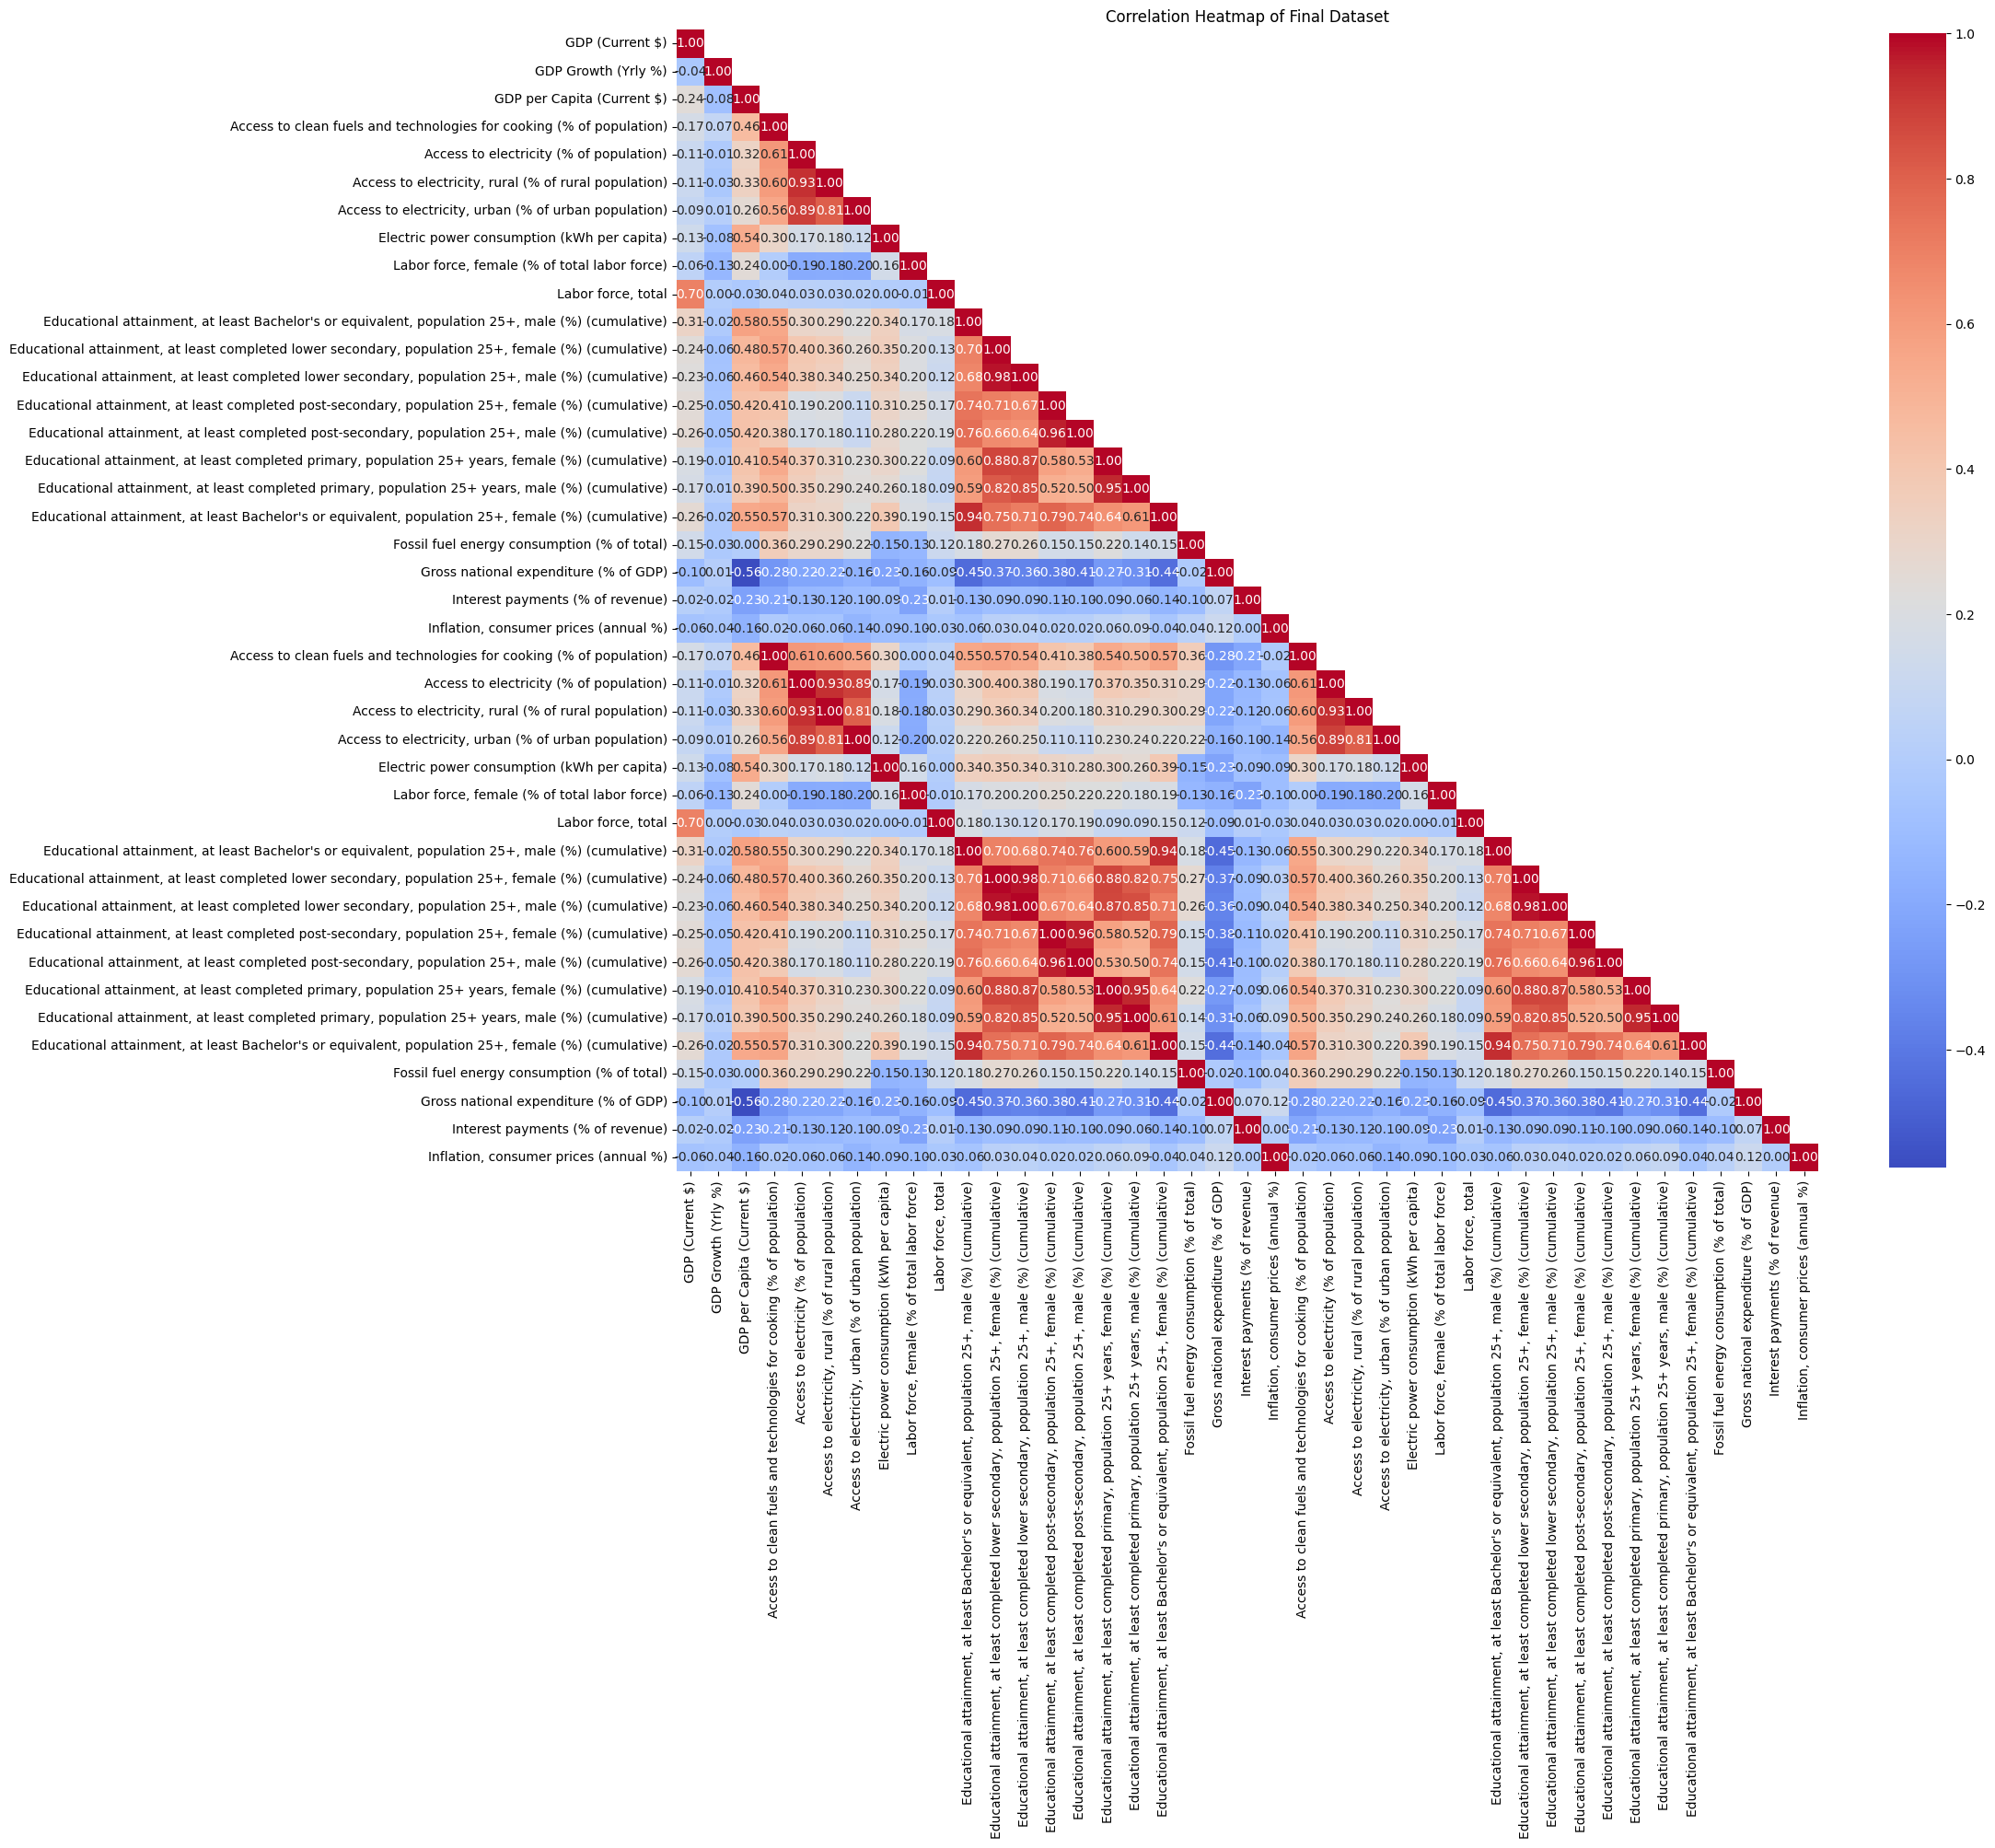

In [ ]:
#heatmap of finalDatasetCleaned
plt.figure(figsize=(20, 20))
sns.heatmap(correlationMatrix, mask = matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Final Dataset')
plt.show()

In [25]:
#adding back the 'Country' and 'Time' columns
finalDatasetCleaned = pd.concat([EconData[['Country', 'Time']], finalDatasetCleaned], axis=1)

In [ ]:
#Saving the cleaned DataFrame as a CSV file
finalDatasetCleaned.to_csv('FinalDatasetCleaned.csv', index=False)

In [ ]:
#removing the space at end of the column names
finalDatasetCleaned.columns = finalDatasetCleaned.columns.str.strip()

In [ ]:
#creating a dataframe for Hierarchal clustering
hierClusterData = ['Country', 'Time', 'Fossil fuel energy consumption (% of total)', 'Electric power consumption (kWh per capita)', 'Access to electricity (% of population)', 
'Gross national expenditure (% of GDP)', 'Interest payments (% of revenue)', 'GDP (Current $)', 'GDP Growth (Yrly %)', 'Inflation, consumer prices (annual %)']

hierClusterData = finalDatasetCleaned[hierClusterData]

In [37]:
# Save the cleaned DataFrame as a CSV file
hierClusterData.to_csv('HierClusteringDataset.csv', index=False)

In [ ]:
#Ensuring column names in kmeansClusterData match those in scaledDatasset
kMeansDataset = ['Country', 'Time','Access to clean fuels and technologies for cooking (% of population)', 'Access to electricity (% of population)', 
'Access to electricity, rural (% of rural population)', 'Access to electricity, urban (% of urban population)', 'Electric power consumption (kWh per capita)', 
'Labor force, female (% of total labor force)', 'Labor force, total', "Educational attainment, at least Bachelor's or equivalent, population 25+, male (%) (cumulative)", 
"Educational attainment, at least completed lower secondary, population 25+, female (%) (cumulative)", 
"Educational attainment, at least completed lower secondary, population 25+, male (%) (cumulative)", 
"Educational attainment, at least completed post-secondary, population 25+, female (%) (cumulative)", 
"Educational attainment, at least completed post-secondary, population 25+, male (%) (cumulative)", 
"Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative)", 
"Educational attainment, at least completed primary, population 25+ years, male (%) (cumulative)", 
"Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative)"]

# Select the columns from the DataFrame
kMeansDataset = finalDatasetCleaned[kMeansDataset]

In [39]:
# Save the cleaned DataFrame as a CSV file
kMeansDataset.to_csv('kMeansClusteringDataset.csv', index=False)